# Make Scorer

- used to create your own metrics. 
- make_scorer()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Lets say our client gave us a Data Set of the following shape.

Text(0, 0.5, 'y')

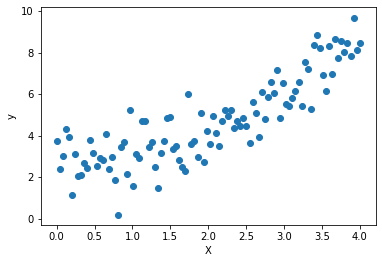

In [6]:
np.random.seed(0)

m=100
X=np.linspace(0,4,m).reshape((m,1))
y=2+X**1.3+np.random.randn(m,1)
y=y.ravel()

plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')


### From there, we develop a linear regression model.


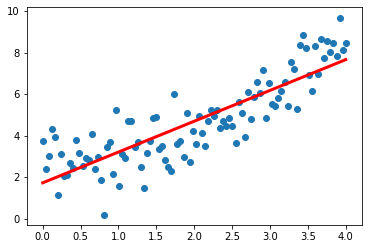

In [7]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X,y)
Y_pred=model.predict(X)

plt.scatter(X,y)
plt.plot(X,Y_pred,c='r',lw=3)


#### We decide to evaluate the mean absolute error.

In [8]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y,Y_pred)

0.8739397321740953

# The Client expects a model respecting :
   ## A maximum difference of 20% between Y and Y_pred.

#### Plot of the client expectation :

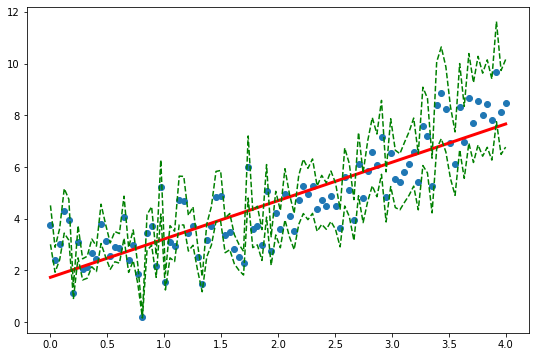

In [9]:
plt.figure(figsize=(9,6))
plt.scatter(X,y)
plt.plot(X,Y_pred,c='r',lw=3)
plt.plot(X,y+y*0.2,c='g',ls='--')
plt.plot(X,y-y*0.2,c='g',ls='--')

# Customize your metric regarding all restrictions given by the client.

In [21]:
def custom_metric(y,y_pred):
    return np.sum((y_pred < y+y*0.2) & (y_pred>y-y*0.2))/y.size

custom_metric(y,Y_pred)

0.63

- 63 points are in the restriction range.

# Example of Make Scorer with Grid Search Cv 


In [22]:
from sklearn.model_selection import cross_val_score ,GridSearchCV

In [23]:
from sklearn.metrics import make_scorer

## Step 1 : Creat our metric

In [24]:
custom_score=make_scorer(custom_metric,greater_is_better=True)

## Step 2 : GridSearchCV : Exhaustive search over specified parameter values for an estimator.

In [25]:
from sklearn.model_selection import cross_val_score ,GridSearchCV
from sklearn.svm import SVR

model=SVR(kernel='rbf',degree=3)

params={'gamma':np.arange(0.1,1,0.05)}

grid=GridSearchCV(model,param_grid=params,cv=3,scoring=custom_score)

grid.fit(X,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(custom_metric), verbose=0)

## Step 3 : Show the best parameters

In [26]:
grid.best_params_

{'gamma': 0.15000000000000002}

## Step 4 : After training our model, we keep this model as the best to use.
## Best Model :

In [27]:
best_model=grid.best_estimator_

## Step 5 : Make a prediction using this best model


In [28]:
y_pred=best_model.predict(X)

custom_metric(y,y_pred)

0.64

## Step 6 Plot the Best Model Representation

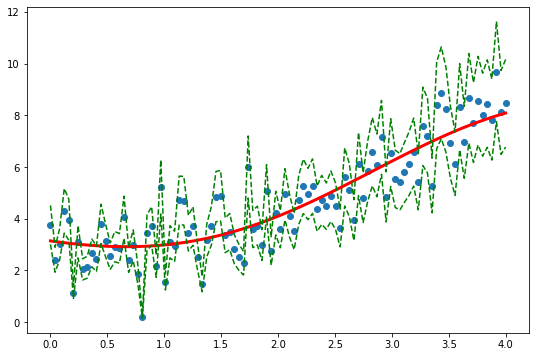

In [29]:
plt.figure(figsize=(9,6))
plt.scatter(X,y)
plt.plot(X,y_pred,c='r',lw=3)
plt.plot(X,y+y*0.2,c='g',ls='--')
plt.plot(X,y-y*0.2,c='g',ls='--')